In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('Bengaluru_House_Data.csv')
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
#Checking for wrong entries in the dataframe like symbols -,?,#,*,etc.
for col in house.columns:
    print('{}:{}'.format(col,house[col].unique()))

area_type:['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability:['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location:['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'


In [5]:
house['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
# So, we are assuming that few columns are not essential to build up the model
df_house = house.drop(['area_type','availability','balcony','society'], axis=1)

In [7]:
df_house.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df_house['location'].value_counts()

Whitefield            540
Sarjapur  Road        399
Electronic City       302
Kanakpura Road        273
Thanisandra           234
                     ... 
Muthyala Nagar          1
Vijaya Bank Colony      1
Craig Park Layout       1
Medaralli               1
T.C. Palya              1
Name: location, Length: 1305, dtype: int64

In [9]:
df_house.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df_house['bath'] = df_house['bath'].fillna(df_house['bath'].median())

In [11]:
# Replacing NA value in features which is containing object with most frequent value
df_house_new = df_house.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [12]:
df_house_new.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df_house_new.shape

(13320, 5)

In [14]:
# Applying the same value in Size feature because there are some chaos
# 1st method: df_house_new['size'].replace(["BHK",'Bedroom',"RK"],"",regex=True).unique()
# 2nd method: df_house_new['size'].str.split(" ", n=1, expand = True)[0]
# 3rd method
df_house_new['bhk'] = df_house_new['size'].apply(lambda x: int(x.split(" ")[0]))

In [15]:
df_house_new.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df_house_new['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df_house_new[df_house_new['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df_house_new['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# so we have found some problem in total sqft column like the data is not a single form "1133 - 1384"
# we need to convert it into float form
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df_house_new[~df_house_new['total_sqft'].apply(is_float)].head(150)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
7001,Thyagaraja Nagar,8 Bedroom,1500Cents,6.0,290.000,8
7248,Hulimavu,2 BHK,132Sq. Yards,2.0,46.000,2
7286,Kanakpura Road,2 BHK,1010 - 1300,2.0,50.125,2
7334,Kanakpura Road,1 Bedroom,2Acres,1.0,125.000,1


<b>Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple</b>

In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [22]:
df_house_new1 = df_house_new.copy() #Creating a deep copy of dataframe

In [23]:
df_house_new1['total_sqft'] = df_house_new1['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df_house_new1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering

In [25]:
df_house_new2 = df_house_new1.copy() # Creating a deep copy

In [26]:
# We are derving the price per square fit which will help to find outlier at later stage
df_house_new2['price_per_squarefit'] =   df_house_new2['price'] * 100000 / df_house_new2['total_sqft']
df_house_new2.head()

,location,size,total_sqft,bath,price,bhk,price_per_squarefit
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df_house_new2['location'].unique() # Checking unique value in location column

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df_house_new2['location'].unique()) #checking length of the unique value in location column

1305

#### We need to apply dimensionality reduction technique here to reduce number of locations

In [29]:
# Now there are two many value in location so first we need to remove white space or commas if available
df_house_new2['location'] = df_house_new2['location'].apply(lambda x: x.strip())

In [30]:
# so lets check it out how many values are there
location_status = df_house_new2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [31]:
threshold = 10
location_less_than_10 = location_status[location_status<=10]
location_less_than_10

location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64

In [32]:
df_house_new2['location'] = df_house_new2['location'].apply(lambda x: 'Other locations' if x in location_less_than_10 else x)
len(df_house_new2['location'].unique())

242

In [33]:
df_house_new2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_squarefit
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other locations,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Removal

In [34]:
# So there will be some bedroom which square fit area will be unusual so lets check it out
df_house_new2[df_house_new2['total_sqft']/df_house_new2['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_squarefit
9,Other locations,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other locations,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [35]:
df_house_new2.shape

(13320, 7)

In [36]:
# so we are negate it through tilde operator
df_house_new3 = df_house_new2[~(df_house_new2['total_sqft']/df_house_new2['bhk']<300)]

In [37]:
df_house_new3.shape

(12576, 7)

In [38]:
df_house_new3.price_per_squarefit.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_squarefit, dtype: float64

##### Here we find that min price per sqft is 267 rs/sqft whilst max is 17000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_squarefit)
        st = np.std(subdf.price_per_squarefit)
        reduced_df = subdf[(subdf.price_per_squarefit>(m-st)) & (subdf.price_per_squarefit<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_house_new4 = remove_pps_outliers(df_house_new3)
df_house_new4.shape

(10301, 7)

##### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

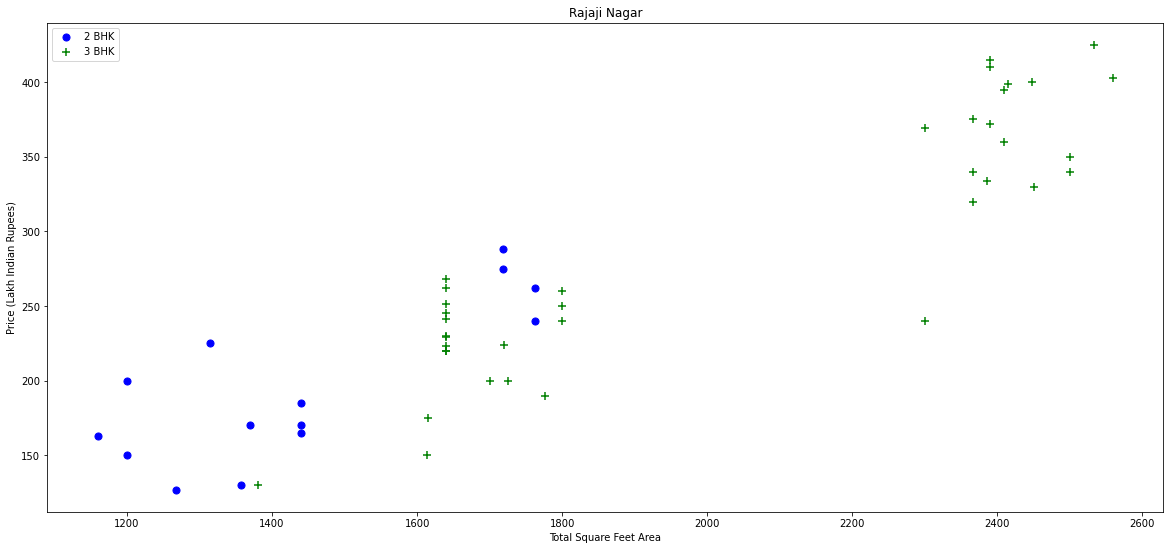

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(20,9))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df_house_new4,"Rajaji Nagar")

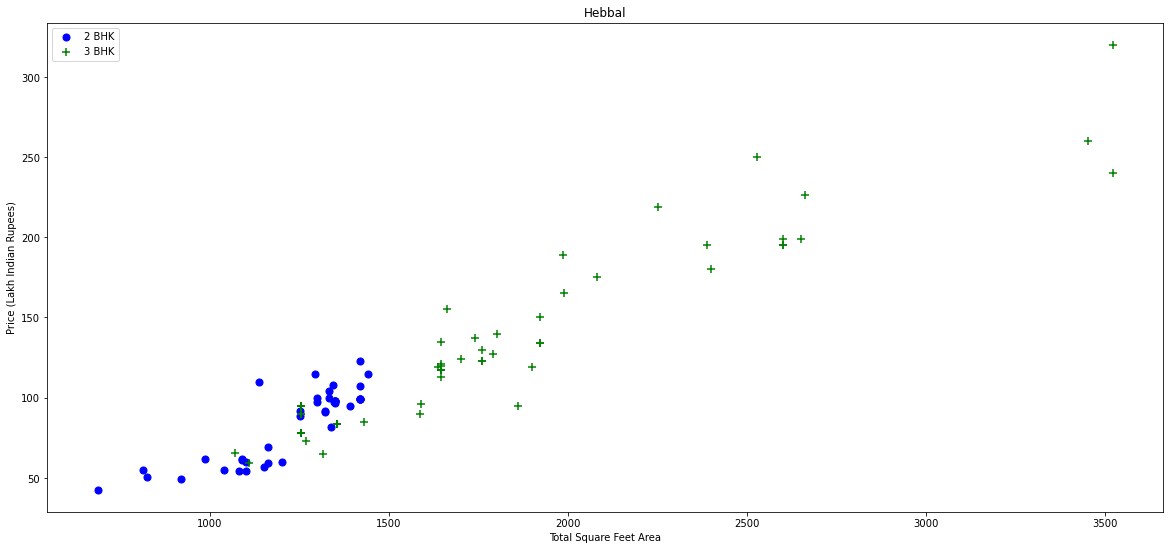

In [41]:
plot_scatter_chart(df_house_new4,"Hebbal")

In [42]:
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_squarefit),
                'std': np.std(bhk_df.price_per_squarefit),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_squarefit<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_house_new5 = remove_bhk_outliers(df_house_new4)

In [43]:
df_house_new5.shape

(7361, 7)

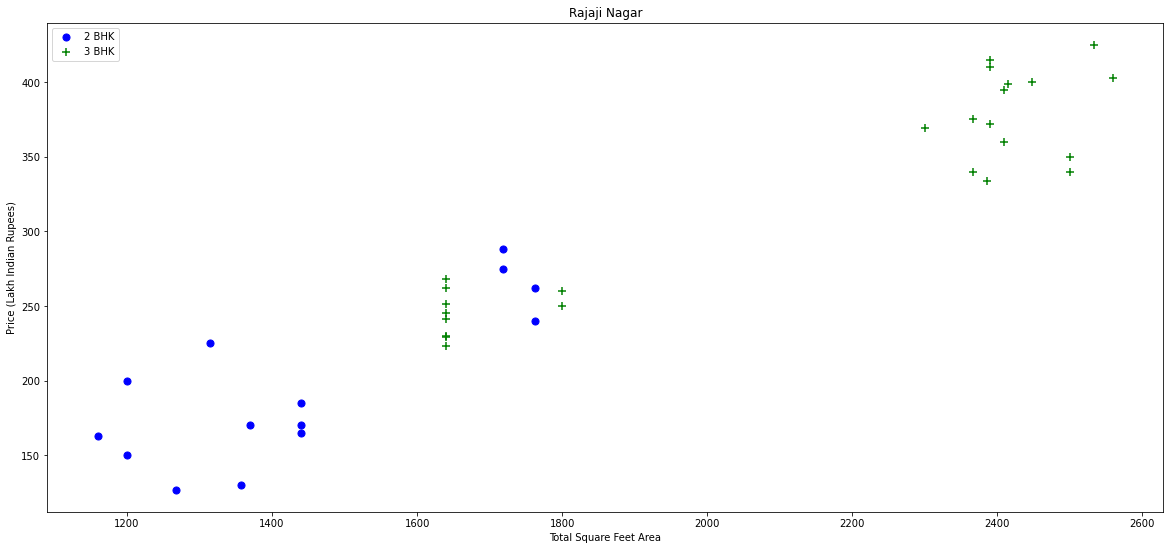

In [44]:
plot_scatter_chart(df_house_new5,"Rajaji Nagar")

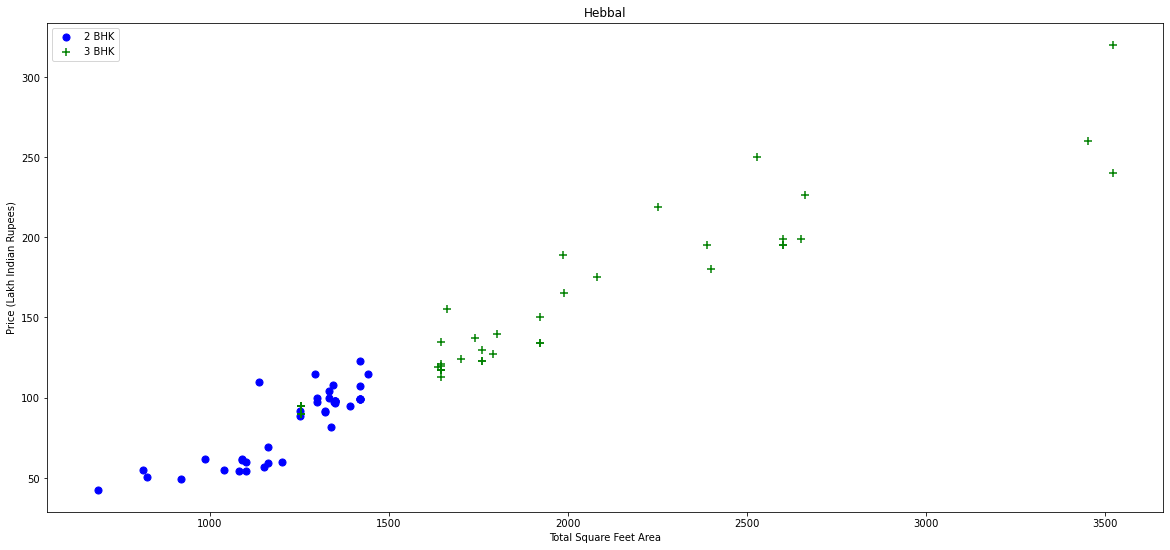

In [45]:
plot_scatter_chart(df_house_new5,"Hebbal")

Text(0, 0.5, 'Count')

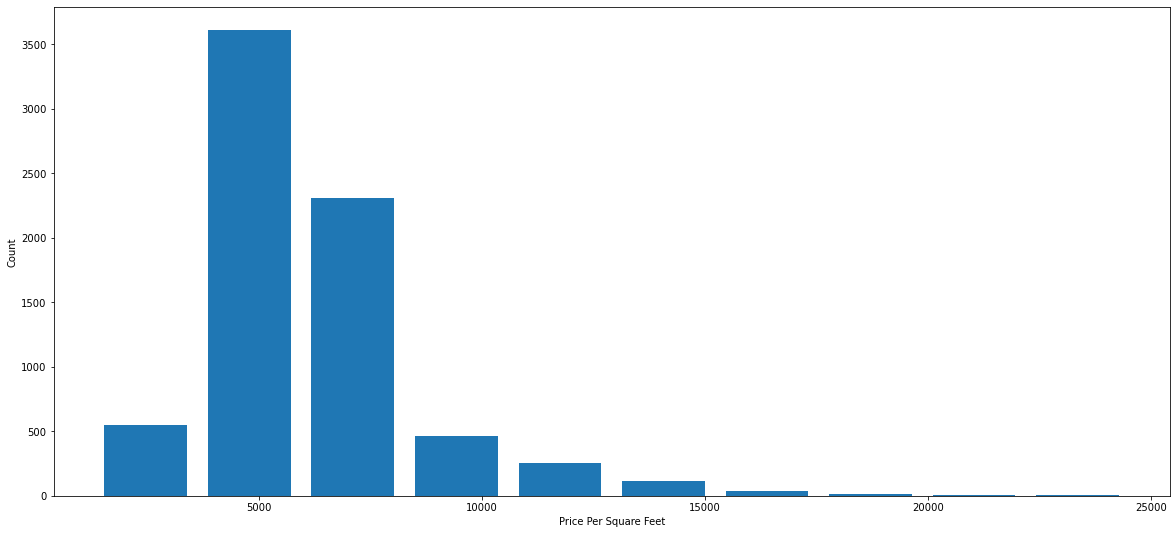

In [46]:
plt.figure(figsize=(20,9))
plt.hist(df_house_new5.price_per_squarefit,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [47]:
df_house_new5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

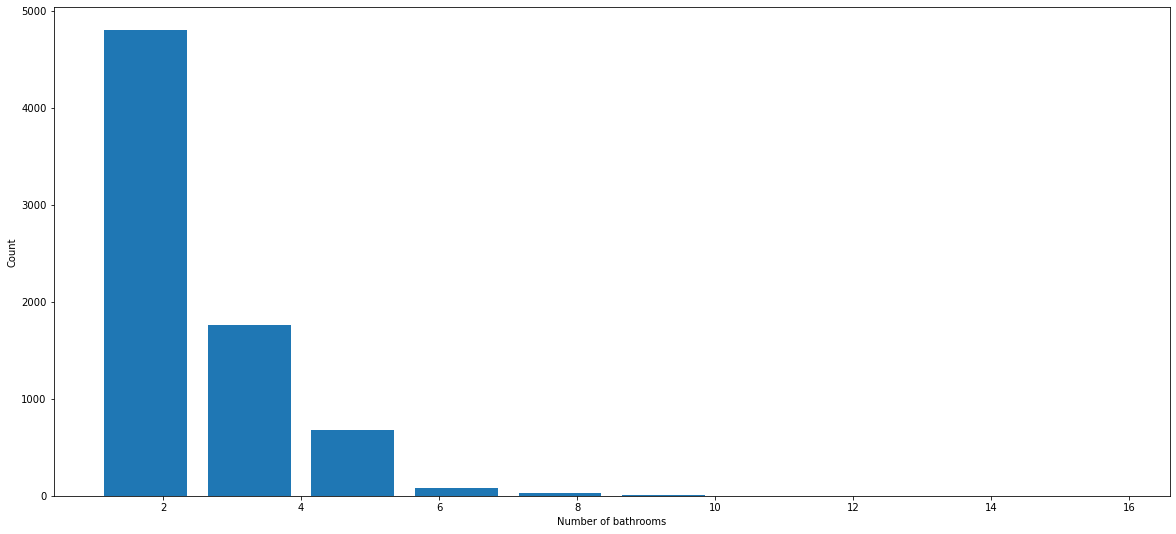

In [48]:
plt.figure(figsize=(20,9))
plt.hist(df_house_new5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [49]:
df_house_new5[df_house_new5.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_squarefit
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5962,Other locations,10 BHK,12000.0,12.0,525.0,10,4375.000000
6051,Other locations,16 BHK,10000.0,16.0,550.0,16,5500.000000
6784,Other locations,11 BHK,6000.0,12.0,150.0,11,2500.000000
7116,Other locations,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [50]:
df_house_new5[df_house_new5.bath>df_house_new5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_squarefit
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5887,Other locations,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9064,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [51]:
df_house_new6 = df_house_new5[df_house_new5.bath<df_house_new5.bhk+2]
df_house_new6.shape

(7282, 7)

In [52]:
df_house_new7 = df_house_new6.drop(['size','price_per_squarefit'],axis='columns')
df_house_new7.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [53]:
df_house_new7['location'].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [54]:
dummies = pd.get_dummies(df_house_new7['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df_house_new8 = pd.concat([df_house_new7,dummies.drop('Other locations',axis=1)], axis=1)

In [56]:
df_house_new8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_house_new8.drop('location', axis=1, inplace=True)

In [58]:
df_house_new8.head(1)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_house_new8.shape

(7282, 245)

In [60]:
X = df_house_new8.drop('price', axis=1)
y = df_house_new8['price']

In [61]:
X.shape

(7282, 244)

### Splitting into train and test

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test,y_test)

0.8797646957584562

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [65]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.84768441, 0.87754824, 0.80546293, 0.83952689, 0.85971123])

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [67]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [68]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.845987,{'normalize': False}
1,lasso,0.689113,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.744770,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### Test the model for few properties

In [69]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lm.predict([x])[0]

In [70]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

82.90226540677517

In [71]:
predict_price('Indira Nagar',1000, 2, 2)

193.9745754514123

In [72]:
import pickle
with open('banglore_housing_prices_model','wb') as f:
    pickle.dump(lm,f)

In [73]:
with open('banglore_housing_prices_model','rb') as f:
    testing = pickle.load(f)

## Export location and column information to a file that will be useful later on in our prediction application

In [74]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))